In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
a = pd.read_csv('d.csv')

In [6]:
cols = a.columns[1:]
d_train_Clean = a[cols]

In [7]:
# El dataset TRAIN con valores numéricos:
d_train_Clean

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,5,5,5,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,3,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,3,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,6,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,3,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,4,6,5,61.9,56.0,5.09,5.12,3.16,1716
40341,40341,0.33,4,7,4,61.8,56.0,4.40,4.44,2.73,781
40342,40342,0.40,5,4,7,61.5,58.0,4.69,4.74,2.90,1123
40343,40343,1.06,4,2,5,61.2,57.0,6.59,6.56,4.03,5651


In [8]:
# Normalizo el dataset:

In [9]:
# Random Forest Regressor:
rf_reg = RandomForestRegressor(n_estimators=15, max_depth=3, min_samples_leaf=3, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

In [86]:
# No uso columnas x, y, z:
Xcols = list(d_train_Clean.columns[1:-1])
Xcols

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [87]:
# Declaro X, y:
X = d_train_Clean[Xcols]
y = d_train_Clean['price']

In [98]:
diccio={}
lista = range(150,180,5)
for i, e in enumerate(lista):
    # Random Forest Regressor:
    rf_reg = RandomForestRegressor(n_estimators=e, max_depth=14, min_samples_leaf=3, random_state=107)
    selector = RFECV(rf_reg, step=1, cv=5, n_jobs=2)

    # Split:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=17)

    # Entreno el modelo:
    model = rf_reg.fit(X_train, y_train)

    # Resultados del dataset TRAIN:
    train_score = (rf_reg.score(X_train, y_train))
    test_score = (rf_reg.score(X_test, y_test))
    rmse = np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test)))

    diccio[f'{e} estimators']={'train_score':train_score,
                               'test_score':test_score,
                               'rmse':rmse}
    
    print (f'Processed {i+1} / {len(lista)}')

Processed 1 / 6
Processed 2 / 6
Processed 3 / 6
Processed 4 / 6
Processed 5 / 6
Processed 6 / 6


In [99]:
diccio

{'150 estimators': {'train_score': 0.9912915336761772,
  'test_score': 0.9829283812994333,
  'rmse': 524.6607704863729},
 '155 estimators': {'train_score': 0.9912922244840199,
  'test_score': 0.9829379637090356,
  'rmse': 524.5135020818516},
 '160 estimators': {'train_score': 0.99129022007494,
  'test_score': 0.9829361859055146,
  'rmse': 524.5408275911241},
 '165 estimators': {'train_score': 0.9912965038150205,
  'test_score': 0.9829599053083754,
  'rmse': 524.1761341586671},
 '170 estimators': {'train_score': 0.9912901128571814,
  'test_score': 0.9829397781092144,
  'rmse': 524.4856126002643},
 '175 estimators': {'train_score': 0.9912908465362484,
  'test_score': 0.9829521684684028,
  'rmse': 524.295118434042}}

In [100]:
# Elijo el que tenga el RMSE menor:
tabla = pd.DataFrame(diccio)
tab = tabla.T
print(tab[tab.rmse==min(tab.rmse)])

                train_score  test_score        rmse
165 estimators     0.991297     0.98296  524.176134


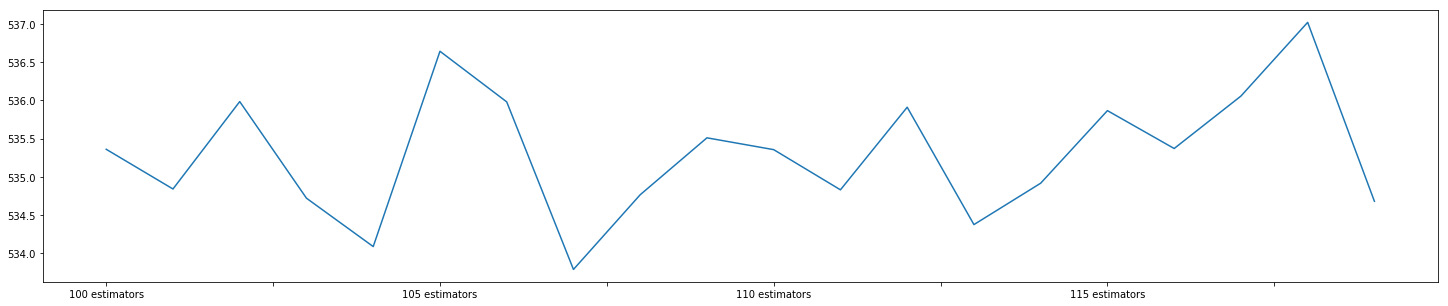

In [68]:
# Reviso la gráfica por si hubiese algún rango mínimo:
tab.rmse.plot(figsize=(25,5))

# Modelo con n_estimators óptimo
n_estimators = 240

In [124]:
defRes={}
n=165
m=14
rs=107
# Random Forest Regressor:
rf_reg = RandomForestRegressor(n_estimators=185, max_depth=14, min_samples_leaf=3, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5, n_jobs=2)

# Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

# Entreno el modelo:
model = rf_reg.fit(X_train, y_train)

# Resultados del dataset TRAIN:
train_score = (rf_reg.score(X_train, y_train))
test_score = (rf_reg.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test)))

defRes[f'{n} estimators']={'train_score':train_score,
                           'test_score':test_score,
                           'rmse':rmse}

In [125]:
defRes

{'165 estimators': {'train_score': 0.9916126649246123,
  'test_score': 0.9813506797271875,
  'rmse': 540.9383956650912}}

In [104]:
# Resultados del dataset TRAIN:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))

0.9912965038150205
0.9829599053083754
RMSE 524.1761341586671


# Diamonds_test

In [ ]:
# Lo aplico a diamonds_test.csv:

In [126]:
df = pd.read_csv('df.csv')

In [127]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,5,3,2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,4,2,3,62.5,57.0,5.07,5.10,3.18
2,2,2.03,5,4,3,61.9,59.0,8.14,8.09,5.02
3,3,1.21,5,5,3,60.0,60.0,6.96,6.91,4.16
4,4,0.55,4,5,3,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,5,6,4,60.0,58.0,4.37,4.40,2.63
13445,13445,0.55,4,7,6,60.8,56.0,5.31,5.34,3.24
13446,13446,0.23,3,6,7,61.3,58.0,3.94,3.96,2.42
13447,13447,0.30,4,7,4,61.4,58.0,4.29,4.31,2.64


In [128]:
X_test = df[Xcols]

In [129]:
# Predicción de precio con los datos de diamonds_test.csv:
y_test_pred = model.predict(X_test)
y_test_pred

# Lo incluyo en el dataframe:
df['price']=y_test_pred

# Preparo df con las 2 columnas que quiero subir (id, price):
sub = df[['id', 'price']]

In [130]:
sub

,id,price
0,0,4561.733240
1,1,1017.799549
2,2,16695.716303
3,3,6663.075156
4,4,1408.167381
...,...,...
13444,13444,735.692670
13445,13445,2652.204683
13446,13446,504.766289
13447,13447,707.094264


In [131]:
# Exporto archivo .csv:
sub.to_csv("sub9.csv", index=False)

In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_242"; OpenJDK Runtime Environment (build 1.8.0_242-8u242-b08-0ubuntu3~19.10-b08); OpenJDK 64-Bit Server VM (build 25.242-b08, mixed mode)
  Starting server from /home/guille/.local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb8v_22zs
  JVM stdout: /tmp/tmpb8v_22zs/h2o_guille_started_from_python.out
  JVM stderr: /tmp/tmpb8v_22zs/h2o_guille_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_guille_xlzaek
H2O cluster total nodes:,1
H2O cluster free memory:,1.702 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
